In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshows(images, titles=[], size=None, clean=False, suptitle=''):
    """Show images, with titles (optional)"""

    assert isinstance(images, list), 'Images must be list'
    assert isinstance(titles, list), 'Titles must be list'
    assert len(images) != 1, 'Use imshow() instead'
    if size:
        try:
            assert isinstance(size, list) or isinstance(size, tuple)
            assert len(size) == 2
            assert len(images) == size[0] * size[1]
        except:
            raise AssertionError('Invalid size')

    if size:
        fig, axes = plt.subplots(
            size[0], size[1], figsize=(size[1]*8, size[0]*5)
        )
    else: 
        fig, axes = plt.subplots(1, len(images), figsize=(15,15))
        for i, image in enumerate(images):
            if(len(image.shape) == 3):
                axes[i].imshow(image)
            else:
                axes[i].imshow(image, plt.cm.gray)
            if titles:
                axes[i].set_title(titles[i])

    for i, (ax, image) in enumerate(zip(axes.flatten(), images)):
        if(len(image.shape) == 3):
            ax.imshow(image)
        else:
            ax.imshow(image, plt.cm.gray)
        if titles:
            ax.set_title(titles[i])
        if clean:
            ax.set_xticks([])
            ax.set_yticks([])
    if suptitle:
        plt.suptitle(suptitle)

    plt.show()

def imshow(image, title=''):
    """Show image, with title (optional)"""

    if(len(image.shape) == 3):
        plt.imshow(image)
    else:
        plt.imshow(image, plt.cm.gray)
    if title:
        plt.title(title)

    plt.show()

def gray(image):
    """Return grayscale image"""
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def hsv(image):
    """Return HSV image"""

    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Bài 1

## Morphology

In [3]:
def dilation(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.dilate(img, kernel, iterations)

def erosion(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.erode(img, kernel, iterations)

def closing(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=iterations)

def opening(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=iterations)

def gradient(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel, iterations=iterations)

In [4]:
def binary(img_gray, threshold=127, inverse=False):
    """Return binary image"""
    if inverse:
        _, mask = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY_INV)
    else:
        _, mask = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
    return mask

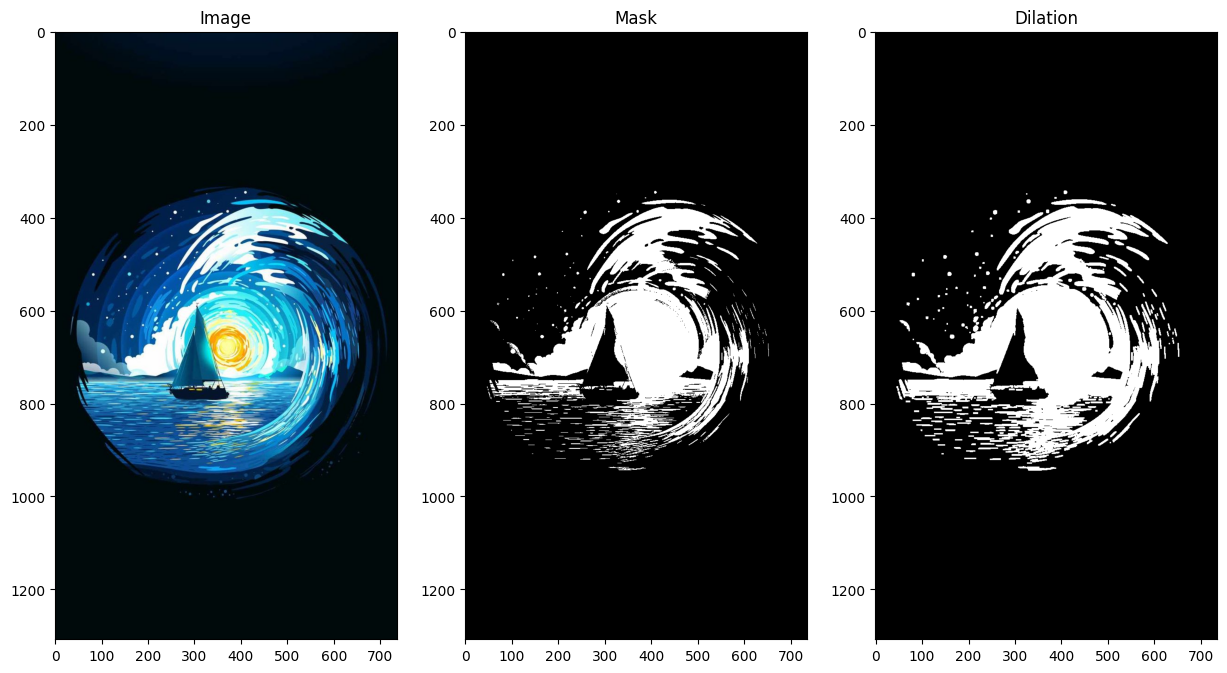

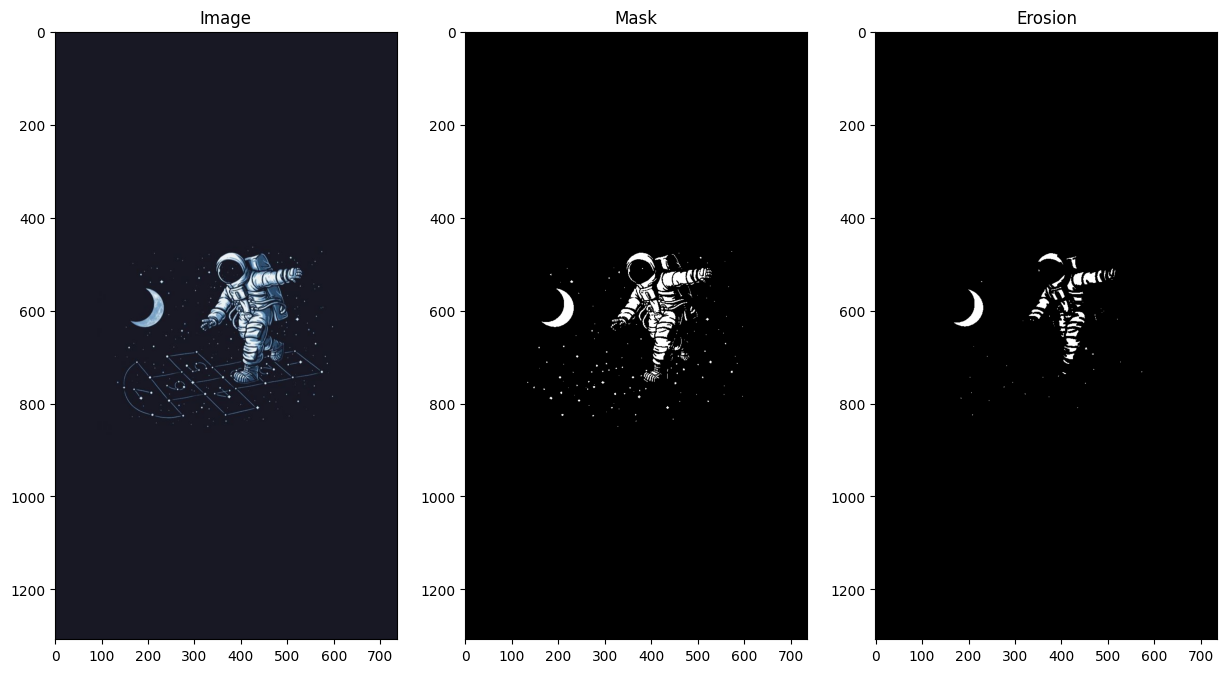

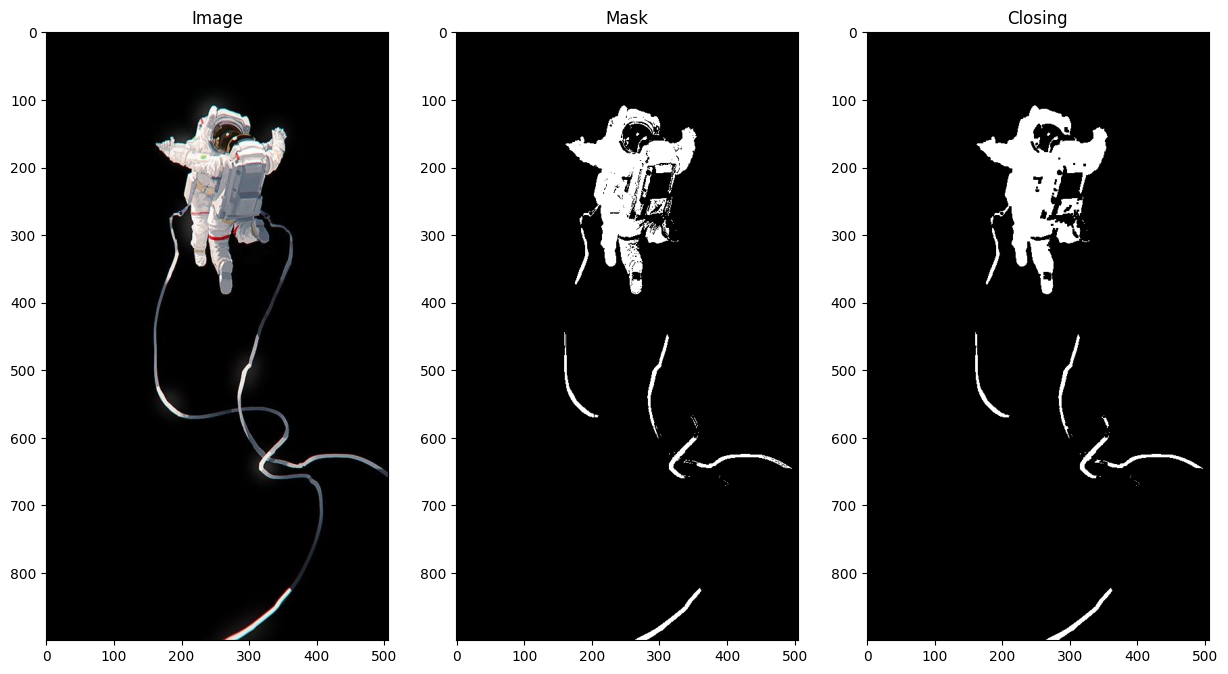

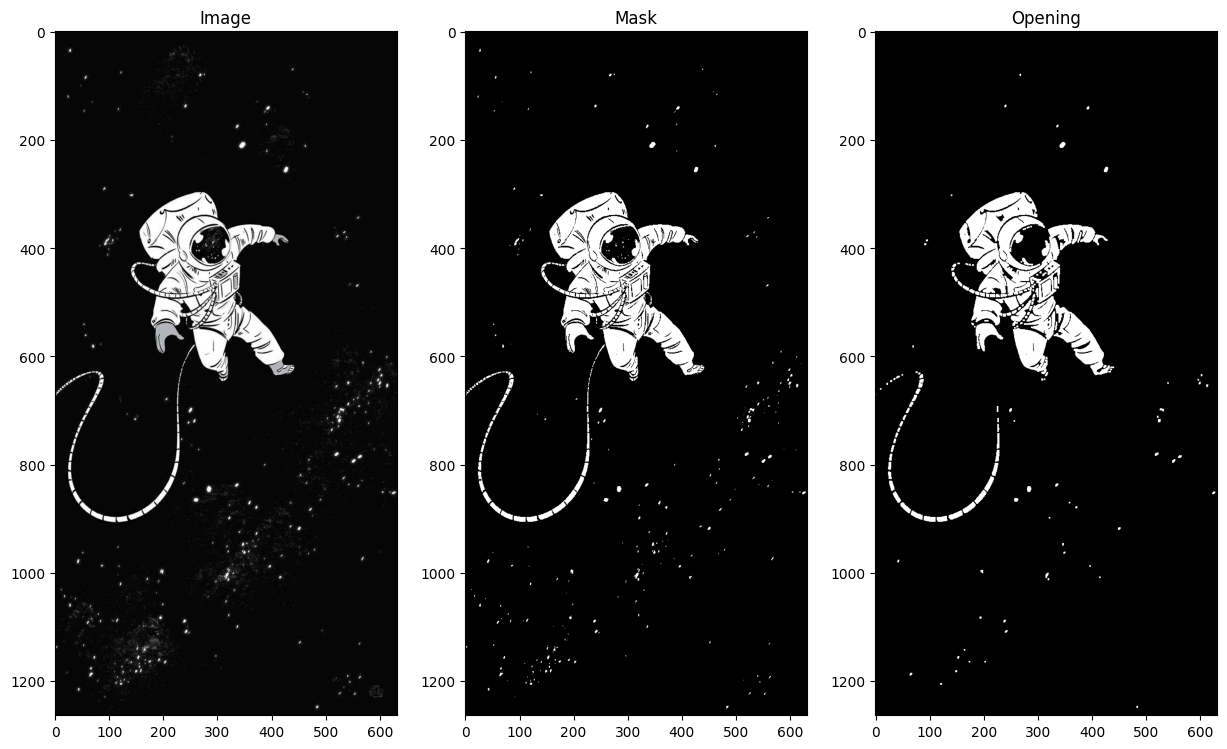

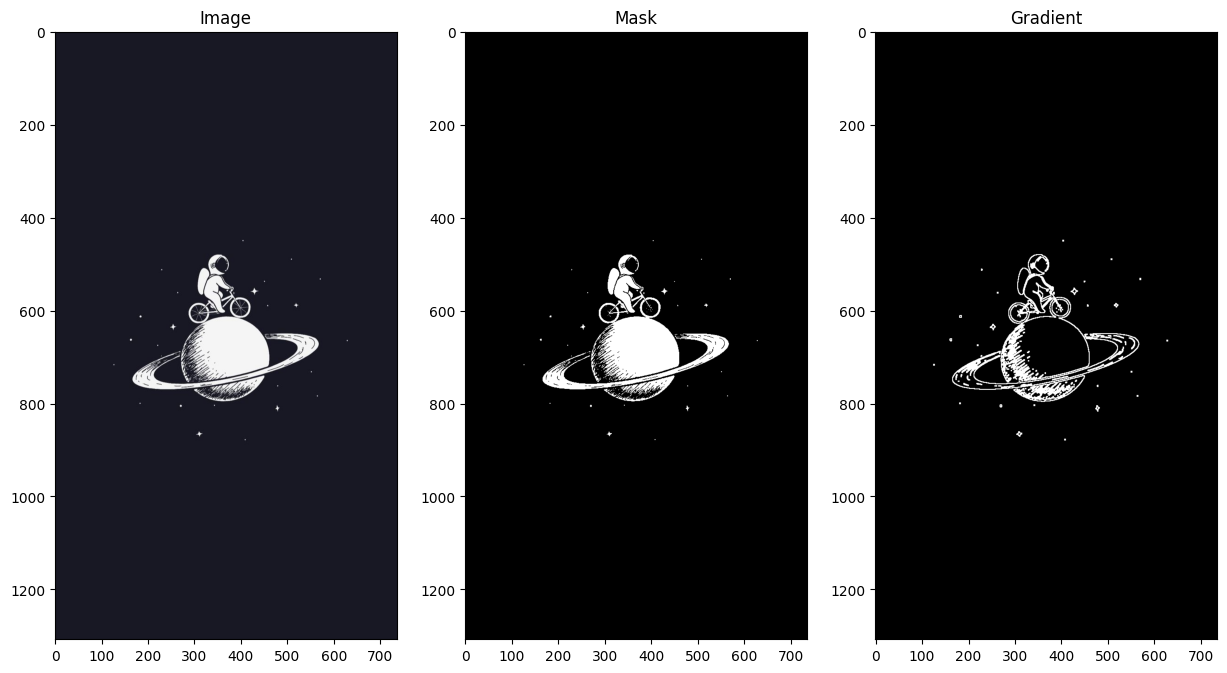

In [5]:
functions = [dilation, erosion, closing, opening, gradient]
titles = ['Dilation', 'Erosion', 'Closing', 'Opening', 'Gradient']

kernel = 3
for i in range(5):
    img = plt.imread(f'images/{i+1}.jpg')
    img_gray = gray(img)
    mask = binary(img_gray)
    imshows([img, mask, functions[i](mask, kernel)], ['Image', 'Mask', titles[i]])

## Noise removal using Morphology

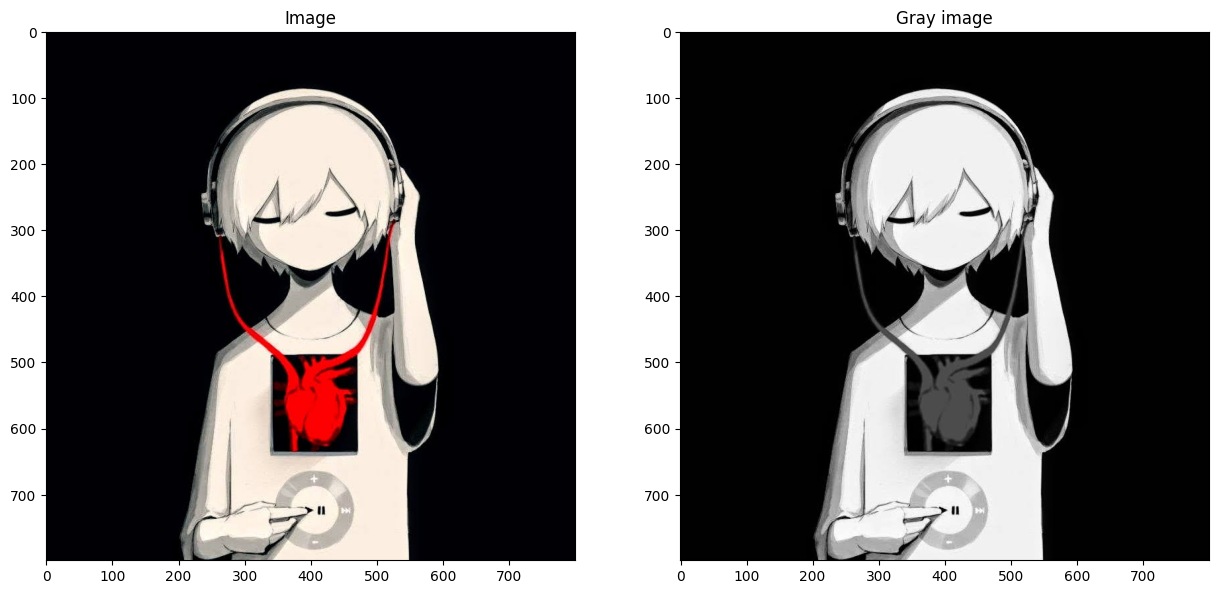

In [6]:
img = plt.imread('images/boi.jpg')
img_gray = gray(img)
imshows([img, img_gray], titles=['Image', 'Gray image'])

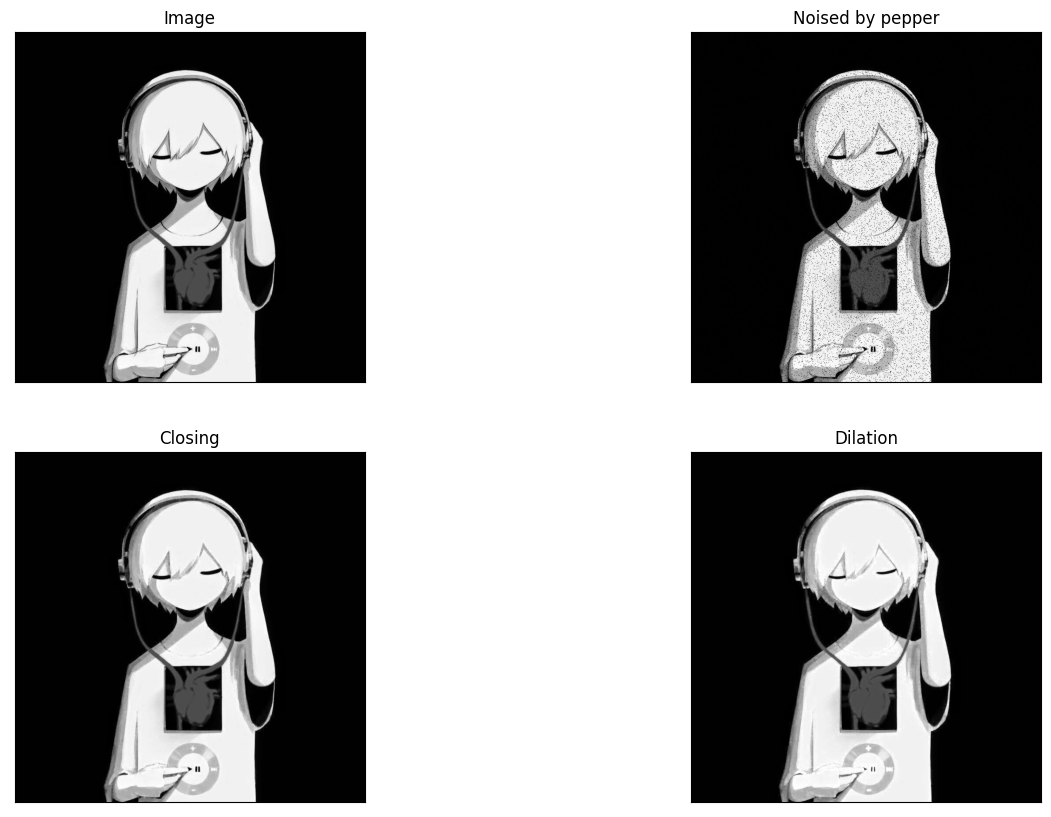

In [7]:
from skimage.util import random_noise

noised = random_noise(img_gray, mode='pepper')
kernel = 3

# Closing - fills small holes within objects
closed = closing(noised, kernel)

imshows(
    [img_gray, noised, closed, dilation(noised)], clean=True, size=(2,2),
    titles=['Image', 'Noised by pepper', 'Closing', 'Dilation'])

$\Rightarrow$ Closing remove noise by pepper

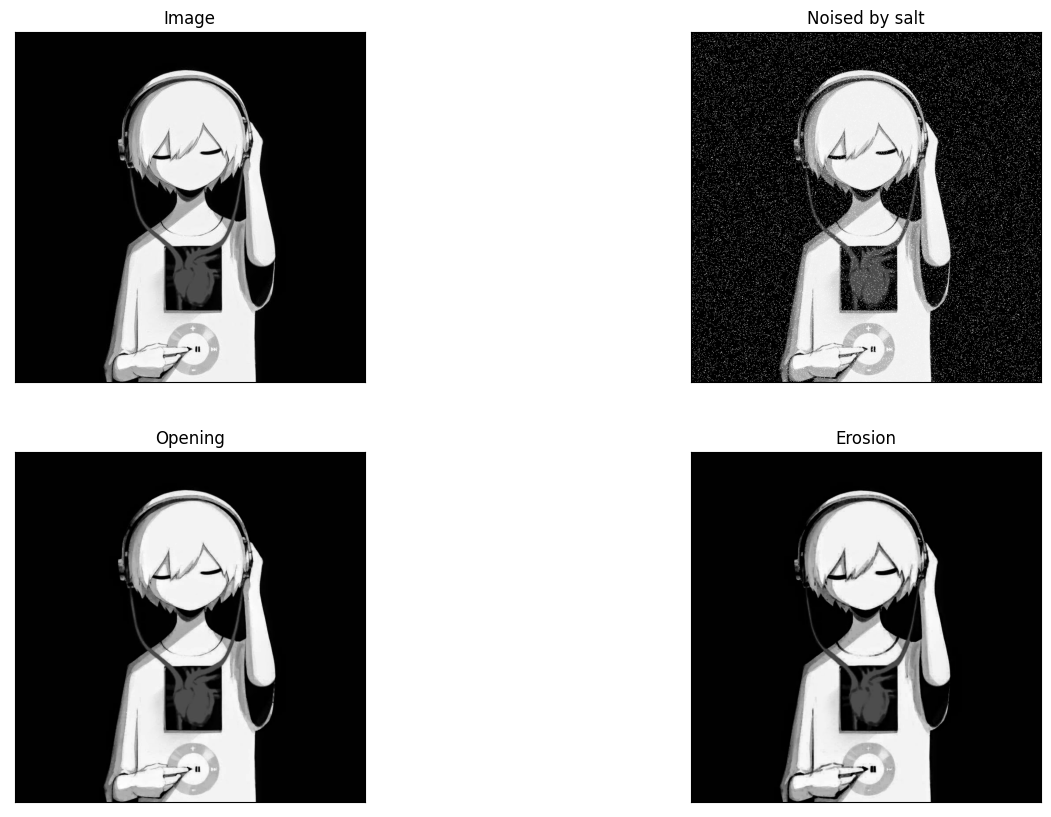

In [8]:
noised = random_noise(img_gray, mode='salt')

# Opening - removes isolated noise while preserving object shape
opened = opening(noised, kernel)

imshows(
    [img_gray, noised, opened, erosion(noised)], clean=True, size=(2,2),
    titles=['Image', 'Noised by salt', 'Opening', 'Erosion'])

$\Rightarrow$ Opening remove noise by salt

## Other Morphology operations

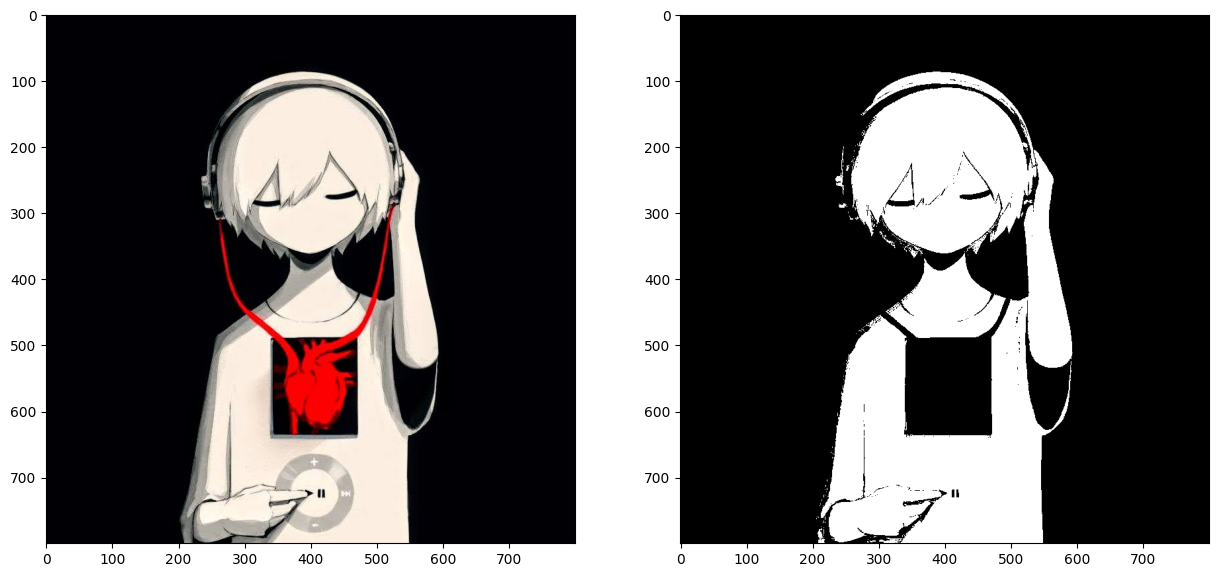

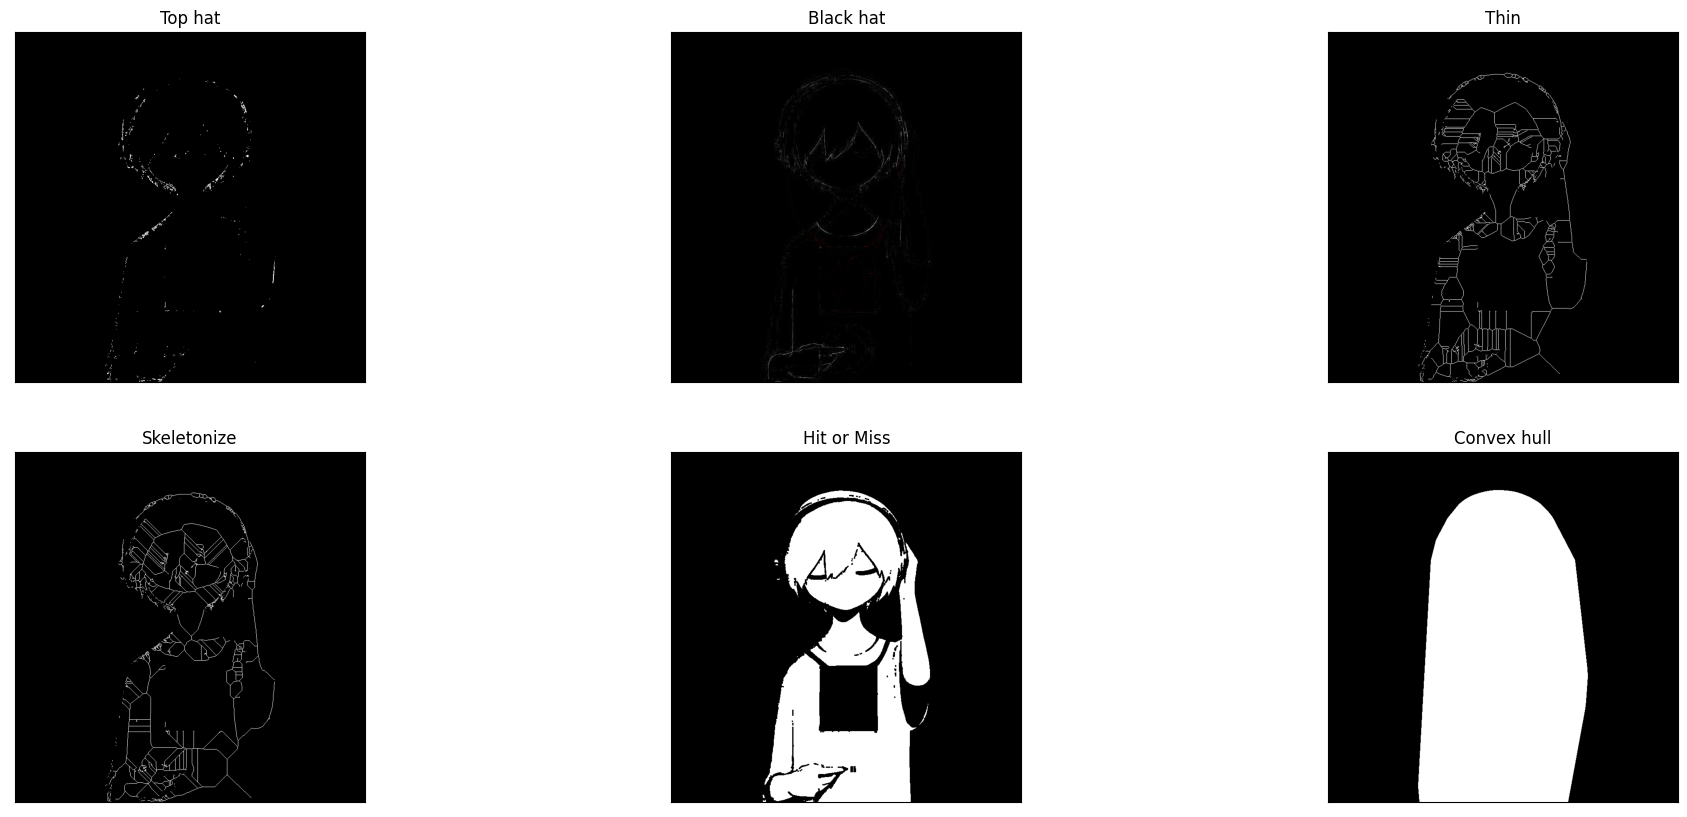

In [9]:
from skimage.morphology import skeletonize, thin, convex_hull_image

img = plt.imread('images/boi.jpg')
mask = binary(gray(img))
imshows([img, mask])

def tophat(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=iterations)

def blackhat(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel, iterations=iterations)

def hitmiss(img, kernel:int=3, iterations:int=1):
    kernel = np.ones((kernel, kernel), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel, iterations=iterations)

tophated = tophat(mask)
blackhated = blackhat(img)
imshows([tophated, blackhated, thin(mask), skeletonize(mask), hitmiss(mask), convex_hull_image(mask)], 
        ['Top hat', 'Black hat', 'Thin', 'Skeletonize', 'Hit or Miss', 'Convex hull'], 
        clean=True, size=(2, 3))

# Bài 2

In [10]:
def generate_index():
    """Generator to increment index after each call"""
    i = 0
    while True:
        yield i
        i += 1

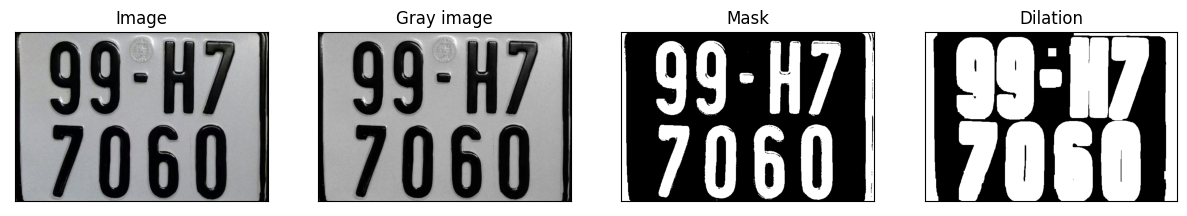

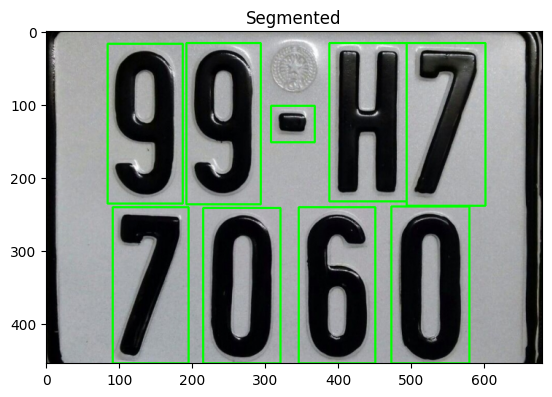

In [11]:
import pandas as pd

img = plt.imread('images/bien_so.jpg')
img_gray = gray(img)
mask = binary(img_gray, inverse=True)
dilated = dilation(mask, kernel=22, iterations=1)

imshows([img, img_gray, mask, dilated], 
        titles=['Image', 'Gray image', 'Mask', 'Dilation'], clean=True)

i = generate_index()
result = img.copy()

# Segmentation
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
df = pd.DataFrame(columns = ["x", "y", "w", "h"])

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Area to suppress
    if w * h > 20000 and w * h < 30000 or (w * h > 1000 and w * h < 5000):   
        cv2.rectangle(result, (x, y), (x+w, y+h), (0,255,0), 2) 
        df.loc[next(i)] = (x, y, w, h)

imshow(result, 'Segmented')

# Bài 3

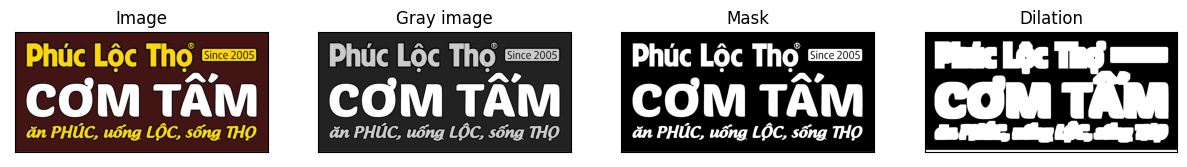

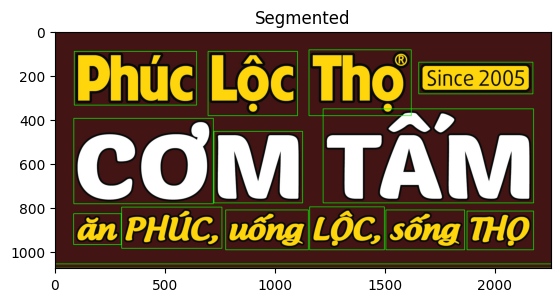

In [12]:
img = plt.imread('images/com.jpg')
img_gray = gray(img)
mask = binary(img_gray)
dilated = dilation(mask, kernel=37, iterations=1)

imshows([img, img_gray, mask, dilated], 
        titles=['Image', 'Gray image', 'Mask', 'Dilation'], clean=True)

i = generate_index()
result = img.copy()

# Segmentation
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
df = pd.DataFrame(columns = ["x", "y", "w", "h"])

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Area to suppress 
    if(w * h > 30000):   
        cv2.rectangle(result, (x, y), (x+w, y+h), (0,255,0), 2) 
        df.loc[next(i)] = (x, y, w, h)

imshow(result, 'Segmented')

# Bài 4

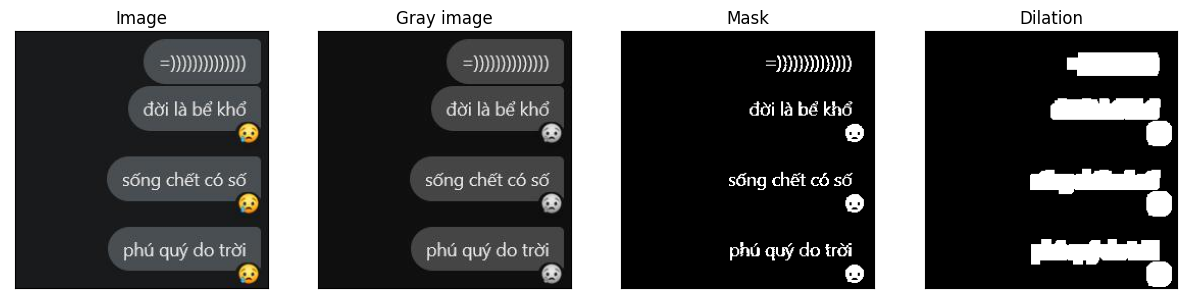

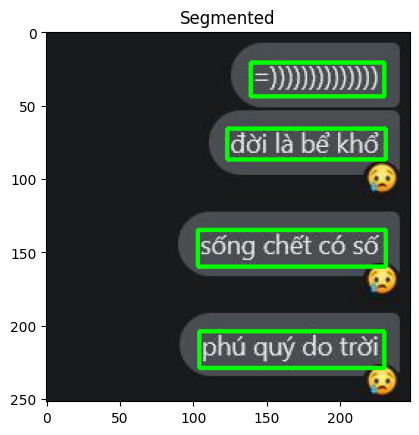

In [13]:
img = plt.imread('images/text.jpg')
img_gray = gray(img)
mask = binary(img_gray)
dilated = dilation(mask, kernel=8, iterations=1)

imshows([img, img_gray, mask, dilated], 
        titles=['Image', 'Gray image', 'Mask', 'Dilation'], clean=True)

i = generate_index()
result = img.copy()

# Segmentation
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
df = pd.DataFrame(columns = ["x", "y", "w", "h"])

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Area to suppress emoji
    if(w * h > 1000):   
        cv2.rectangle(result, (x, y), (x+w, y+h), (0,255,0), 2) 
        df.loc[next(i)] = (x, y, w, h)

imshow(result, 'Segmented')

# Watershed segmentation

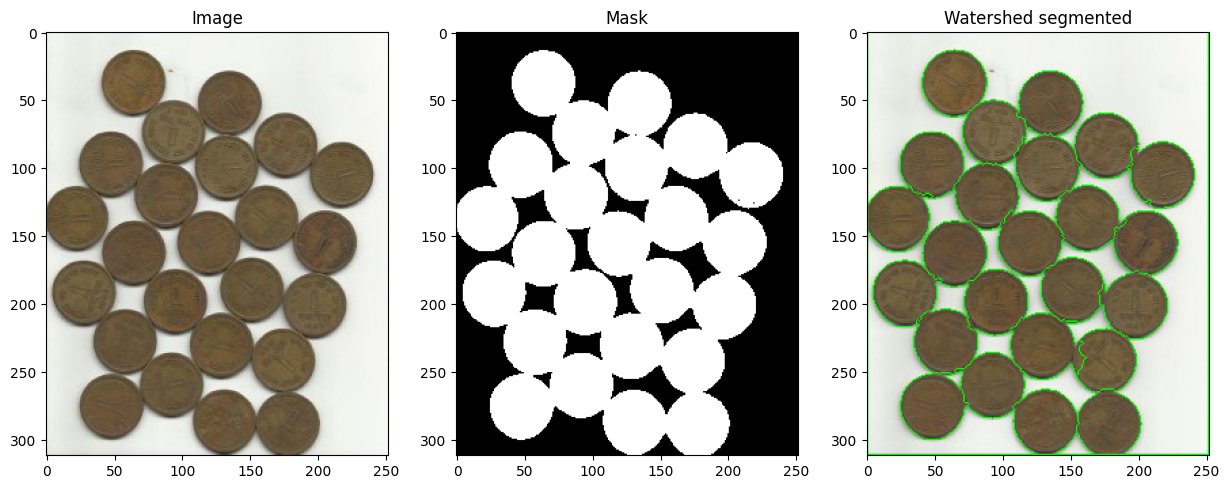

In [14]:
image = plt.imread('images/coins.jpg')
img = image.copy()
mask = binary(gray(img), inverse=True)

# Noise removal
opened = opening(mask, 5)

# Sure background area
sure_bg = dilation(opened, kernel, 3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(img, markers)

# Color the segmented regions
img[markers == -1] = [0, 255, 0]  # Mark watershed boundaries 
imshows([image, mask, img], ['Image', 'Mask', 'Watershed segmented'])

# Region segmentation using K-means clustering

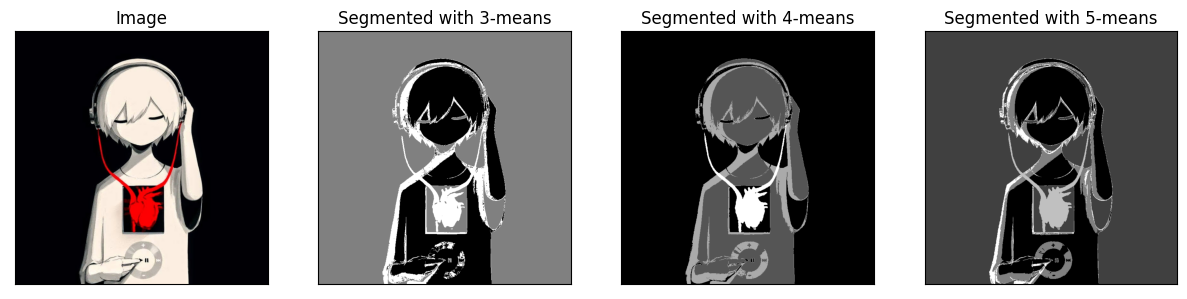

In [15]:
from sklearn.cluster import KMeans

def kmeans_segmentation(img, k=3):
    pixels = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pixels)
    labels = kmeans.labels_
    segmented = labels.reshape(img.shape[:2])

    return segmented


img = plt.imread('images/boi.jpg')
img_list = [img]
titles = ['Image']

for k in [3, 4, 5]:
    img_list.append(kmeans_segmentation(img, k))
    titles.append(f'Segmented with {k}-means')
imshows(img_list, titles, clean=True)